In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Import Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_prep_new.csv")

# Feature selection

In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
rfe = RFE(model, n_features_to_select=15)

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
fit = rfe.fit(X, y)

In [ ]:
selected_features = X.columns[fit.support_]
X_selected = X[selected_features]

In [ ]:
X_selected.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Gender Female',
       'Not a SeniorCitizen', 'Not Have Partner', 'Not Have MultipleLines',
       'Using Fiber optic as InternetService', 'Not Have OnlineSecurity',
       'Not Have OnlineBackup', 'Not Have DeviceProtection',
       'Not have TechSupport', 'Month-to-month', 'Not Using PaperlessBilling',
       'Electronic check'],
      dtype='object')

In [ ]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)

In [ ]:
X_selected

,tenure,MonthlyCharges,TotalCharges,Gender Female,Not a SeniorCitizen,Not Have Partner,Not Have MultipleLines,Using Fiber optic as InternetService,Not Have OnlineSecurity,Not Have OnlineBackup,Not Have DeviceProtection,Not have TechSupport,Month-to-month,Not Using PaperlessBilling,Electronic check
0,-1.280248,-1.161694,-0.994194,1,1,0,0,0,1,0,1,1,1,0,1
1,0.064303,-0.260878,-0.173740,0,1,1,1,0,0,1,0,1,0,1,0
2,-1.239504,-0.363923,-0.959649,0,1,1,1,0,0,0,1,1,1,0,0
3,0.512486,-0.747850,-0.195248,0,1,1,0,0,0,1,0,0,0,1,0
4,-1.239504,0.196178,-0.940457,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,1,0,0,0,0,1,0,0,0,0,0
7028,1.612573,1.276493,2.241056,1,1,0,0,1,1,0,0,1,0,0,0
7029,-0.872808,-1.170004,-0.854514,1,1,0,0,0,0,1,1,1,1,0,1
7030,-1.158016,0.319168,-0.872095,0,0,0,0,1,1,1,1,1,1,0,0


# Dimenctional reduction

kita coba autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
X = X_selected
y = df["Churn"]

In [ ]:
input_dim = X_selected.shape[1]
encoding_dim = 10

In [ ]:
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

In [ ]:
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
28/28 [==============================] - 1s 4ms/step - loss: 0.7555
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6833
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 0.6084
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5286
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4453
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3578
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.2641
Epoch 8/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1638
Epoch 9/50
28/28 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 10/50
28/28 [==============================] - 0s 3ms/step - loss: -0.0667
Epoch 11/50
28/28 [==============================] - 0s 4ms/step - loss: -0.1996
Epoch 12/50
28/28 [==============================] - 0s 3ms/step - loss: -0.3461
Epoch 13/50
28/28 [===========================

In [ ]:
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
28/28 [==============================] - 1s 2ms/step - loss: -18.7100
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: -19.2292
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: -19.7604
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: -20.2966
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: -20.8513
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: -21.4095
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: -21.9827
Epoch 8/50
28/28 [==============================] - 0s 2ms/step - loss: -22.5636
Epoch 9/50
28/28 [==============================] - 0s 2ms/step - loss: -23.1565
Epoch 10/50
28/28 [==============================] - 0s 2ms/step - loss: -23.7630
Epoch 11/50
28/28 [==============================] - 0s 2ms/step - loss: -24.3805
Epoch 12/50
28/28 [==============================] - 0s 2ms/step - loss: -25.0069
Epoch 13/50
28/28 [======

In [ ]:
encoder = models.Model(input_layer, encoded)
X_encoded = encoder.predict(X)

220/220 [==============================] - 0s 1ms/step


In [ ]:
X_encoded.shape

(7032, 10)

In [ ]:
X_encoded_df = pd.DataFrame(X_encoded)

In [ ]:
X_encoded_df

,0,1,2,3,4,5,6,7,8,9
0,38.707088,0.000000,39.567425,40.892818,38.605450,0.000000,39.784725,35.225784,40.395405,0.051598
1,24.888643,5.179101,25.550220,26.204433,24.785694,5.180747,25.231131,22.715904,25.528484,2.665562
2,32.586948,0.000000,33.091728,34.579193,33.517647,0.000000,32.034100,29.538464,34.191505,0.000000
3,18.495407,5.780319,19.319715,18.809490,18.015718,5.528791,19.390476,17.999201,18.516331,1.408390
4,41.846504,2.608130,42.701992,47.371983,42.177242,3.208976,42.961945,35.994774,43.783054,6.328729
...,...,...,...,...,...,...,...,...,...,...
7027,9.516180,6.771715,10.146962,10.194134,8.842700,6.384558,9.446671,7.892608,9.821112,3.319030
7028,0.000000,34.116859,0.000000,0.000000,0.000000,35.922398,0.000000,0.000000,0.000000,29.373556
7029,36.723122,0.000000,37.481560,38.691757,36.359497,0.000000,38.109116,33.734829,38.417709,0.000000
7030,23.830524,0.000000,25.048891,28.520433,24.168797,1.192580,24.830820,19.419310,25.822987,1.649875


# Modeling

## Baseline model

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
X = X_encoded_df
y = df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7782515991471215
Precision: 0.6076388888888888
Recall: 0.4679144385026738
F1-score: 0.5287009063444108
Confusion matriks: 
 [[920 113]
 [199 175]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
from sklearn.metrics import roc_curve, auc

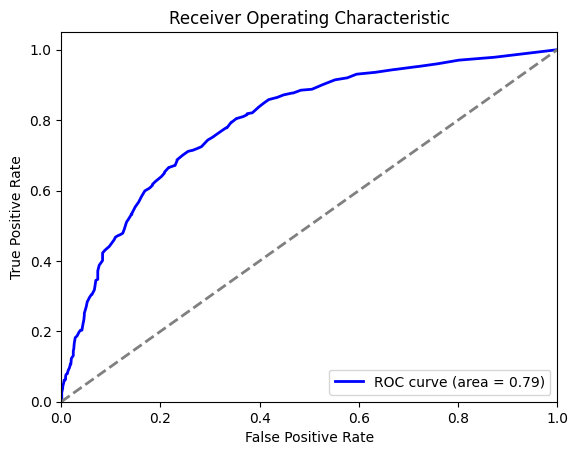

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve, StratifiedKFold

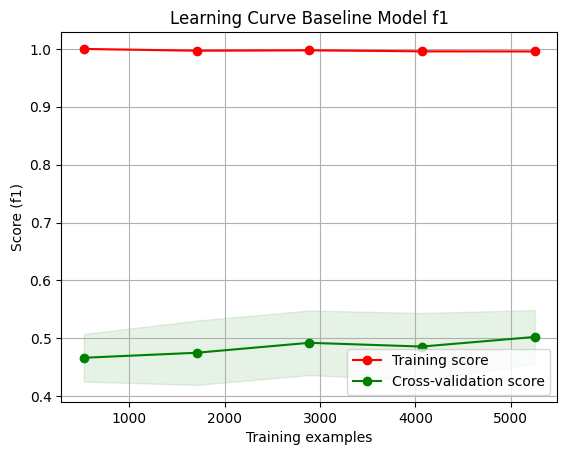

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

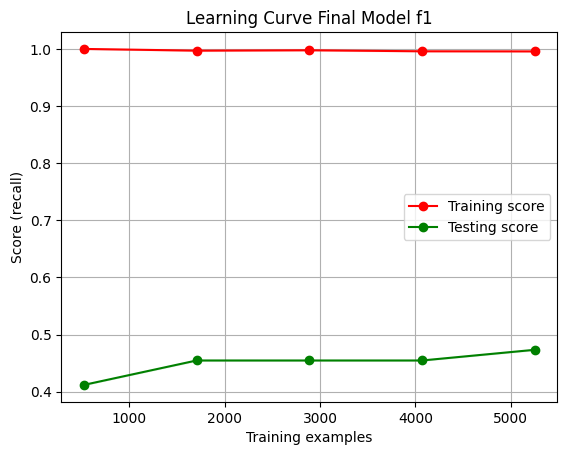

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.5388127853881279
f1 train: 0.9652847994607348


## Model Performance Curves

### max_depth

In [ ]:
from sklearn.model_selection import cross_val_score

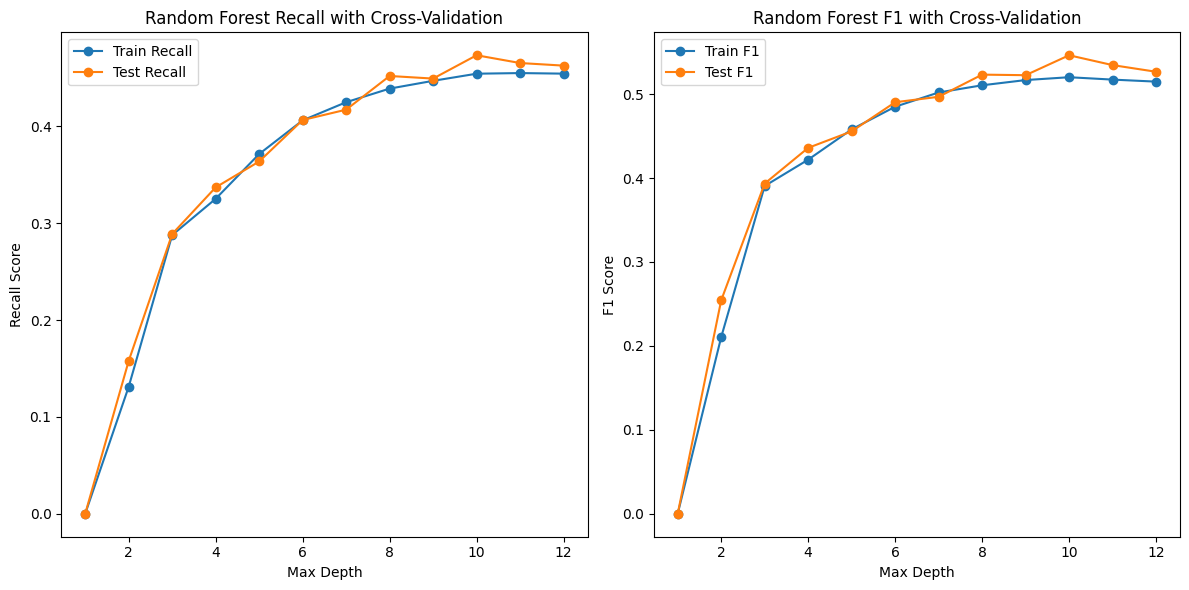

In [ ]:
values = [i for i in range(1, 13)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(max_depth=i, random_state=42, n_jobs=-1)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("Max Depth")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

pada nilai f1, Kurva pelatihan (Train F1) dan kurva pengujian (Test F1) meningkat seiring bertambahnya max depth dan mencapai puncaknya sekitar max depth 6-8

Setelah max depth 8, kurva pengujian sedikit menurun, menunjukkan potensi overfitting jika max depth terlalu besar.

6, 7, dan 8 nampaknya nilai max depth yang optimal untuk f1

### min_samples_split

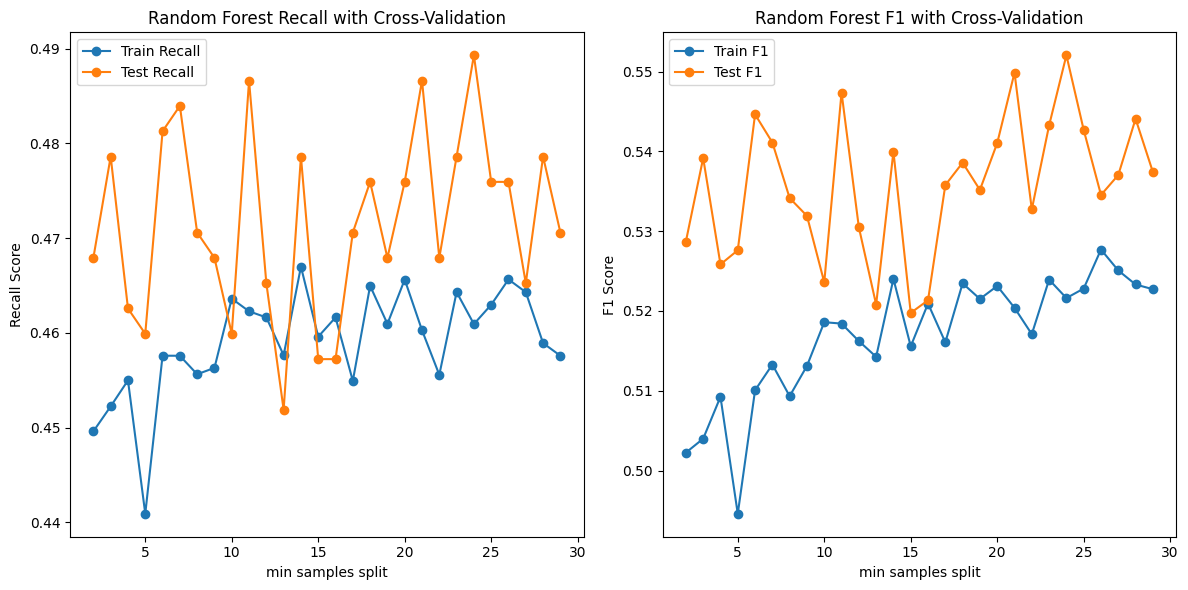

In [ ]:
values = [i for i in range(2, 30)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_split=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples split")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples split")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

Pada nilai min samples split antara 15 hingga 25 skor pengujian (Test Recall dan Test F1) cenderung lebih stabil dan lebih tinggi dibandingkan dengan nilai lainnya.

### min_samples_leaf

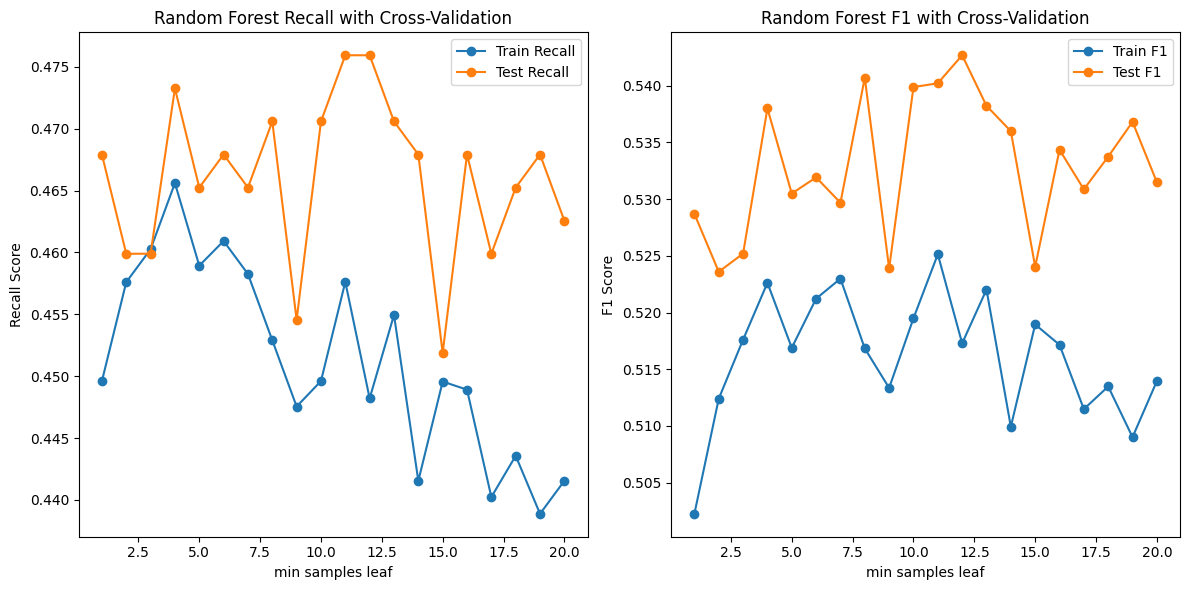

In [ ]:
values = [i for i in range(1, 21)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples leaf")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples leaf")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

nilai optimal nampaknya di nilai 11

## Hyperparameter tunning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6,7,8],
    'min_samples_split': [15,16,17,18,19,20,21,22,23,24,25],
    'min_samples_leaf': [11],
    'bootstrap': [True, False]
}

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [11],
                                        'min_samples_split': [15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='f1')

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 700, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': False}


## Evaluasi model

In [ ]:
rf = RandomForestClassifier(
    bootstrap = False,
    random_state=42,
    max_depth = 8,
    max_features = "sqrt",
    min_samples_leaf = 11,
    min_samples_split = 16,
    n_estimators = 700)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=11,
                       min_samples_split=16, n_estimators=700, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7825159914712153
Precision: 0.6172413793103448
Recall: 0.4786096256684492
F1-score: 0.5391566265060243
Confusion matriks: 
 [[922 111]
 [195 179]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



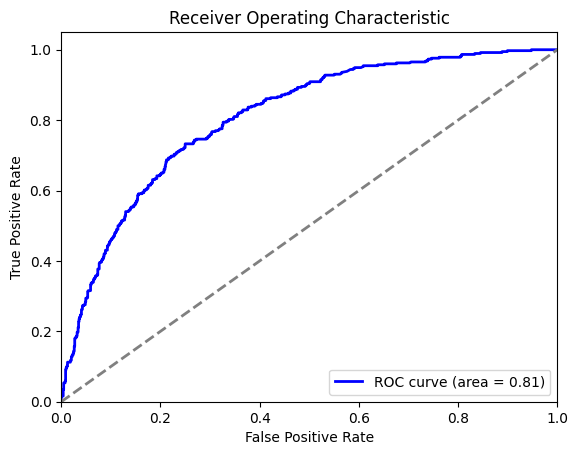

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

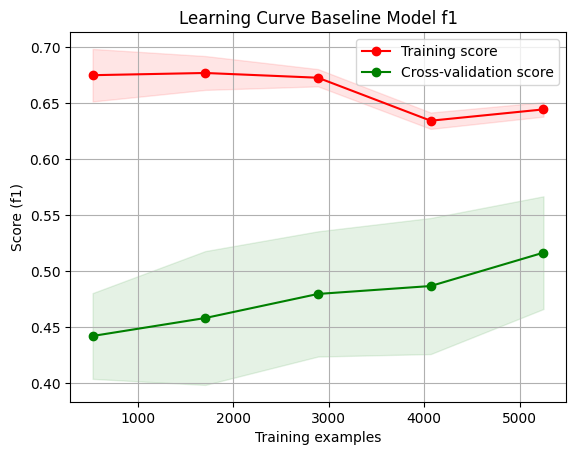

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

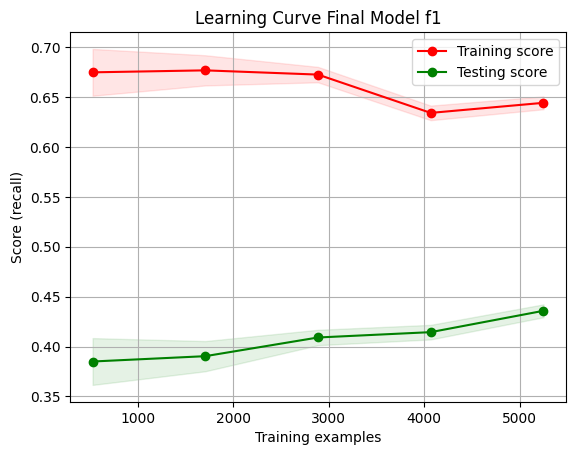

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.5101721439749609
f1 train: 0.634920634920635
